In [1]:
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import scipy.stats as stats
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from Image_Similarity_Modules import * 

In [3]:
imgs_dir = os.getcwd() + '\Image Similarity\dev_dataset'
os.chdir(imgs_dir)

In [4]:
img_arrs = get_img_array(imgs_dir)
h, w = get_h_w(img_arrs)
padded_imgs = get_padded(img_arrs, h, w)

In [5]:
padded_imgs = np.stack(padded_imgs, axis = 0)

In [6]:
colors = ['red', 'green', 'blue']

In [7]:
#grayscale = [rgb2gray(img) for img in padded_imgs]

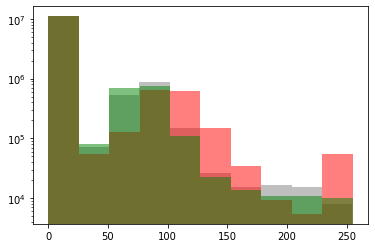

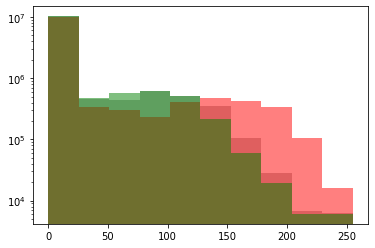

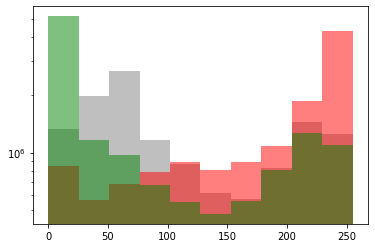

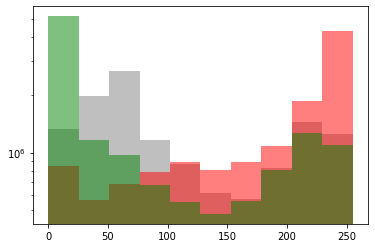

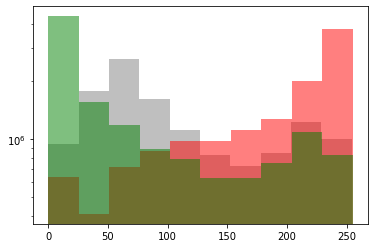

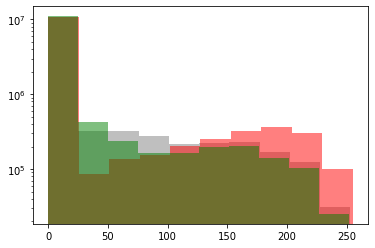

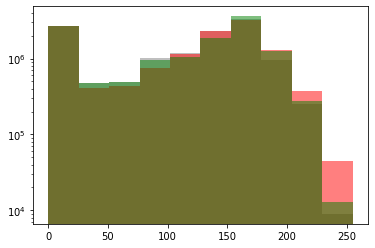

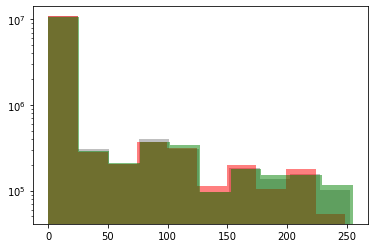

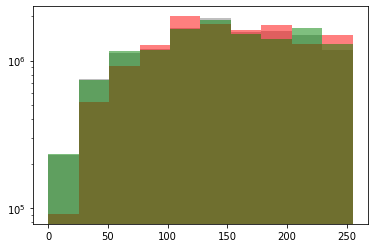

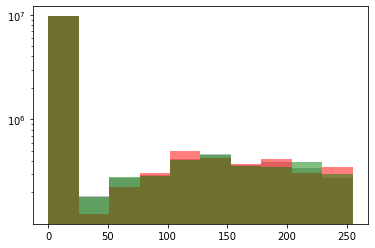

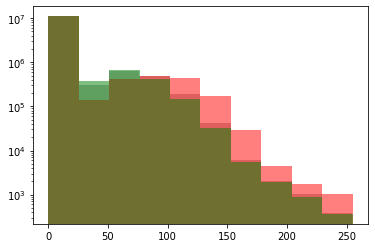

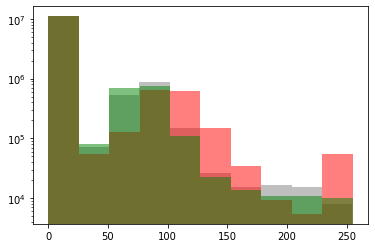

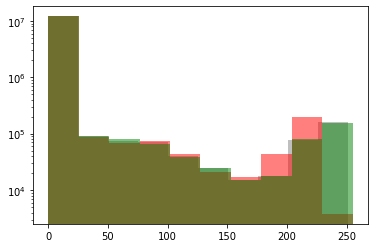

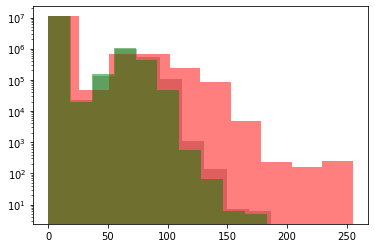

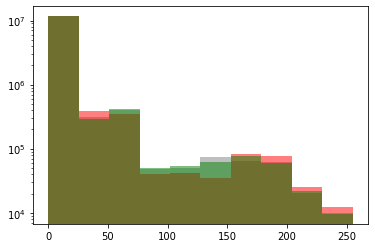

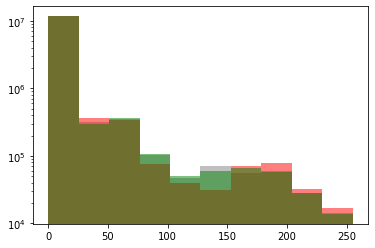

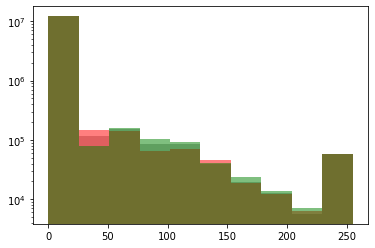

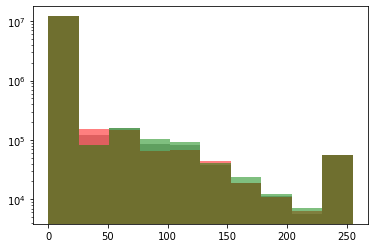

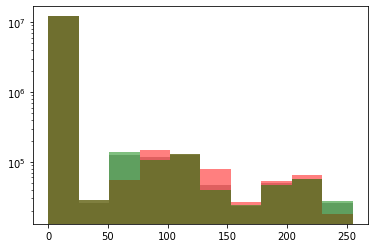

In [18]:
#get_histograms(channel, imgs_dir, img, color, show)

for i in range(len(padded_imgs)):
    for j in range(3):
        get_histograms(colors[j], padded_imgs[i], show=False)
    plt.show()

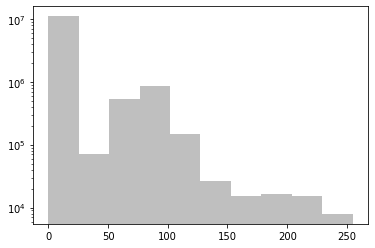

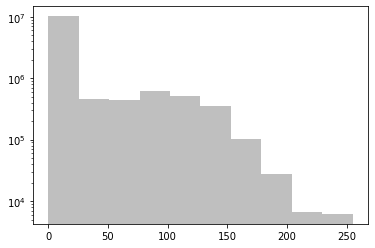

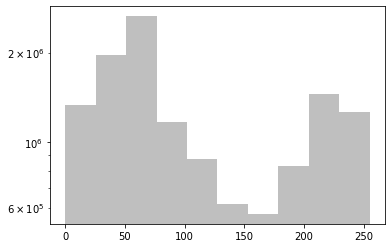

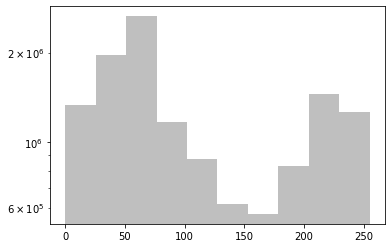

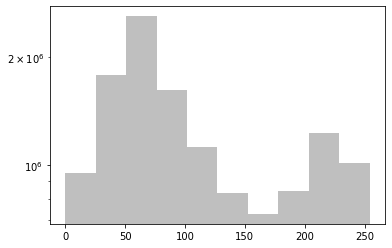

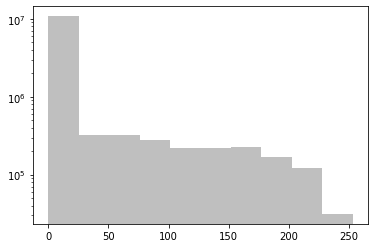

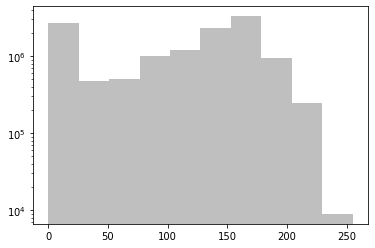

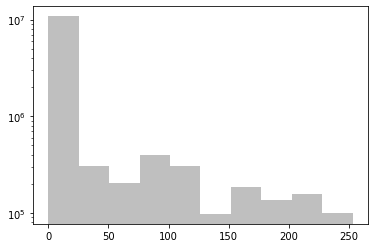

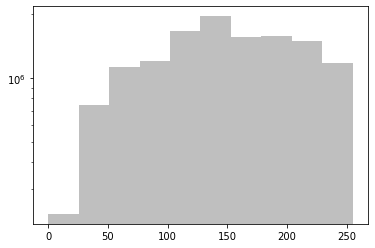

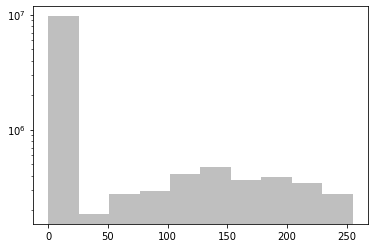

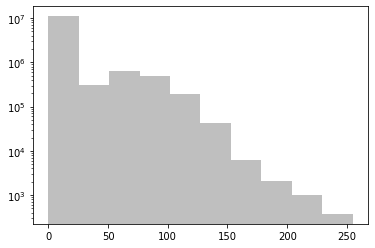

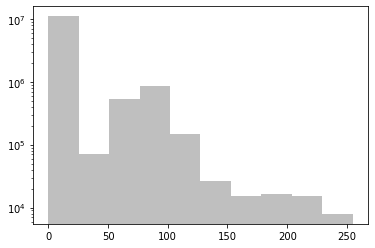

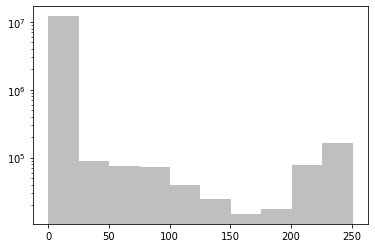

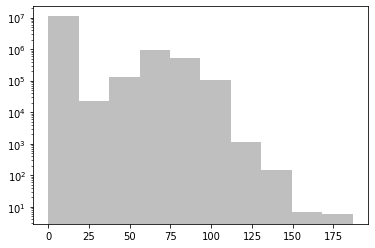

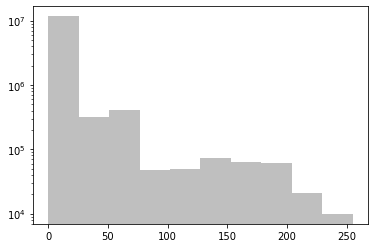

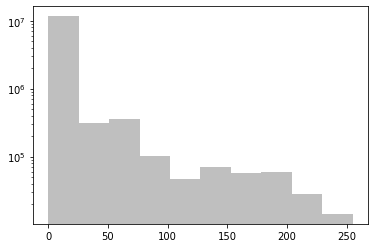

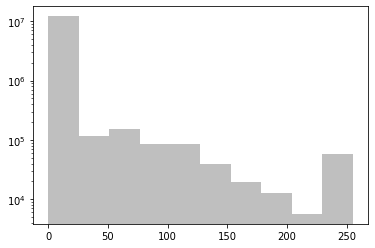

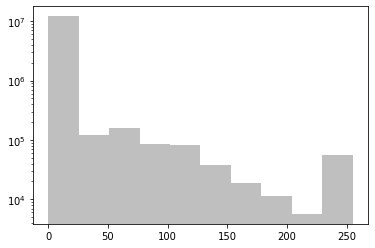

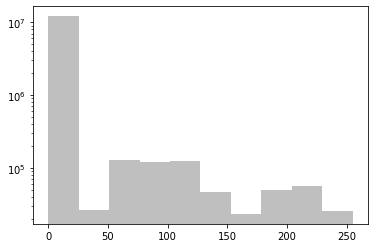

In [19]:
for i in range(len(padded_imgs)):
    get_histograms('gray', padded_imgs[i], show=True)

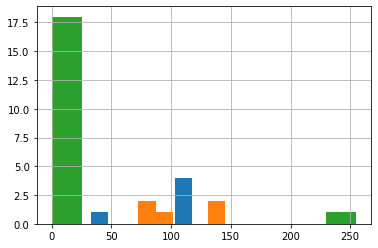

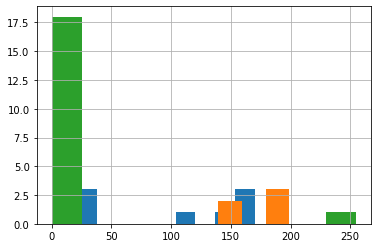

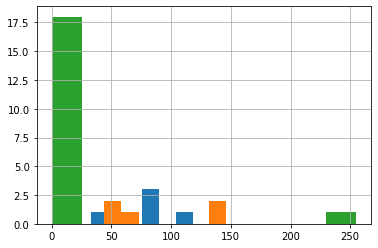

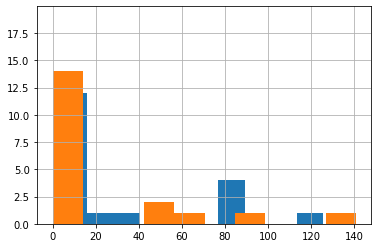

In [17]:
colors = ['gray', 'red', 'green', 'blue']
for c in colors:
    df = get_df(c, imgs_dir, padded_imgs)
    for m in ['Mean', 'Median', 'Mode']:
        col = c + ' ' + m
        df[col].hist()
    plt.show()

Mean


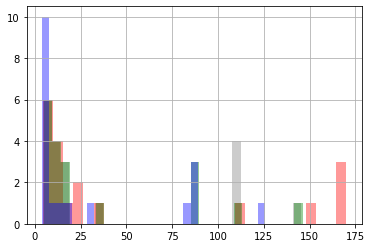

Median


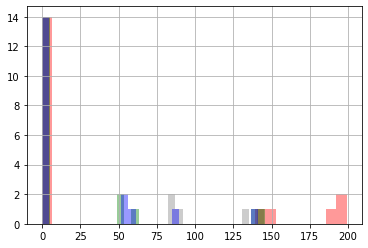

Mode


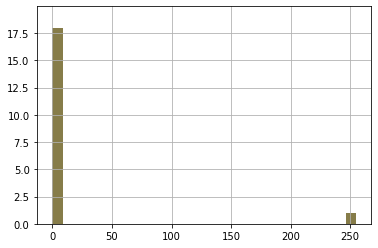

In [16]:
for m in ['Mean', 'Median', 'Mode']:
    print (m)
    for c in colors:
        df = get_df(c, imgs_dir, padded_imgs)
        col = c + ' ' + m
        df[col].hist(color = c, alpha=.4, bins = 30)
    plt.show()


In [ ]:
colors = ['gray', 'red', 'green', 'blue']
for c in colors:
    df = get_df(c, imgs_dir, padded_imgs)
    corr = df.iloc[:, 2:].T.corr().round(2)
    get_triangle_corr(corr)

In [278]:
df_list_total = pd.merge(pd.merge(df_list[0], df_list[1], how='inner', on = ['Img index', 'Img name']), df_list[2], how='inner', on = ['Img index', 'Img name'])

In [326]:
df_list_total

,Img index,Img name,Red Mean,Red Median,Red Mode,Green Mean,Green Median,Green Mode,Blue Mean,Blue Median,Blue Mode
0,0,1.jpg,66.617261,67.0,77.0,67.435272,68.0,69.0,67.806129,68.0,69.0
1,1,10.jpg,62.627407,61.0,23.0,62.640410,61.0,17.0,63.083021,62.0,24.0
2,2,11.jpg,94.919007,55.0,0.0,95.121138,56.0,0.0,95.312968,55.0,0.0
3,3,11_duplicate.jpg,94.919007,55.0,0.0,95.121138,56.0,0.0,95.312968,55.0,0.0
4,4,11_modification.jpg,95.433169,61.0,0.0,95.471442,61.0,0.0,95.536517,60.0,0.0
5,5,12.jpg,95.168056,95.0,25.0,95.909722,96.0,26.0,96.606111,97.0,27.0
6,6,13.jpg,143.510417,153.0,164.0,143.444059,154.0,160.0,143.172197,154.0,161.0
7,7,14.jpg,53.073834,35.0,18.0,52.950572,35.0,19.0,52.611369,35.0,18.0
8,8,15.jpg,175.126145,172.0,255.0,174.991987,171.0,255.0,175.380609,172.0,255.0
9,9,15_modification.jpg,171.600549,169.0,255.0,171.242736,169.0,255.0,170.803477,168.0,255.0


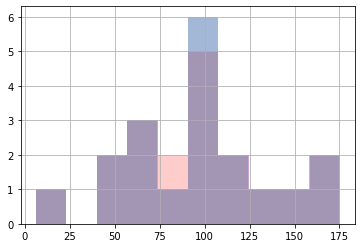

In [325]:
df_list_total['Red Mean'].hist(alpha = 0.2, color = 'r')
df_list_total['Green Mean'].hist(alpha = 0.2, color = 'g')
df_list_total['Blue Mean'].hist(alpha = 0.2, color = 'b')
plt.show()

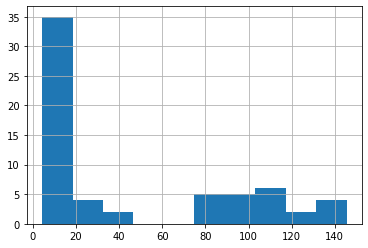

In [312]:
imgs_df['Greyscale Mean'].hist()

In [353]:
for i in range(len(padded_imgs)):
    for j in range(len(padded_imgs)):
        matrix[i][j] = np.linalg.norm(padded_imgs[i]-padded_imgs[j])

In [355]:
pd.DataFrame(matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,437271.030376,946888.885727,946888.885727,9.624671e+05,355723.664168,759351.389338,397799.452175,935768.528401,455573.234932,492938.030063,0.000000,271964.121595,618208.873379,299358.208065,298861.446236,280143.682774,280290.199240,273990.072581
1,416933.499645,0.000000,950357.654985,950357.654985,9.643565e+05,404501.132247,762222.437928,426570.555195,930038.403927,466502.015601,515015.514372,416933.499645,374873.675343,614180.406311,387233.616320,385635.163223,381921.971264,382142.416191,373670.897501
2,787527.738032,788533.848042,0.000000,0.000000,1.040208e+06,785887.130127,872306.642230,788277.820186,904176.262509,791122.641820,809751.494068,787527.738032,769374.417002,830781.910195,775957.444809,776063.299452,770345.575001,770368.610940,768196.241611
3,787527.738032,788533.848042,0.000000,0.000000,1.040208e+06,785887.130127,872306.642230,788277.820186,904176.262509,791122.641820,809751.494068,787527.738032,769374.417002,830781.910195,775957.444809,776063.299452,770345.575001,770368.610940,768196.241611
4,804136.547335,803489.607488,875831.435424,875831.435424,0.000000e+00,802642.290862,876494.787014,805232.250530,906196.997525,806618.868170,824019.374192,804136.547335,788573.897112,838321.733972,793932.623593,793885.990900,788370.618832,788333.773222,786630.769368
5,360346.716329,429825.522822,948536.384451,948536.384451,9.628389e+05,0.000000,762882.660031,394551.230362,922432.690805,448184.408329,502728.719407,360346.716329,342213.452906,619926.219980,349339.449866,348920.637462,342559.343120,342450.821385,342900.365716
6,846074.159667,845029.917360,896772.773253,896772.773253,9.004046e+05,840250.867196,0.000000,850123.205317,935338.390336,847598.455896,835268.407955,846074.159667,841089.134681,825304.236257,839827.827152,839519.503080,841815.726352,841809.903794,843210.217662
7,345743.516022,412322.424400,944160.171092,944160.171092,9.572075e+05,367790.468310,756851.371551,0.000000,923229.313245,446799.757481,501854.981144,345743.516022,326258.747402,611947.581833,336067.934527,335342.174221,338407.813883,338929.629674,326632.145310
8,904015.440467,911855.976740,922374.663219,922374.663219,9.217762e+05,907497.590173,893001.393659,908109.312065,0.000000,917078.600462,901032.059502,904015.440467,888051.243831,909721.619809,890966.173526,890956.393932,892196.757486,892141.489491,889435.223661
9,455014.920514,446747.078835,947736.823166,947736.823166,9.593334e+05,453774.141384,756885.550538,452022.785821,917180.999368,0.000000,532779.493093,455014.920514,443662.433982,613613.515324,447202.441165,447105.580010,452307.934043,452413.138958,445654.321378


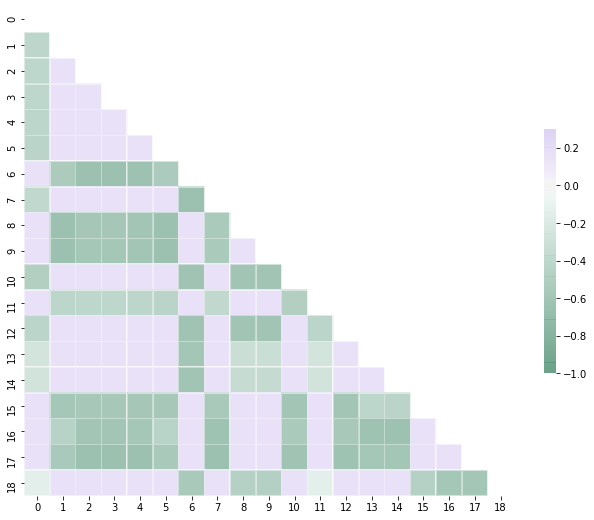

In [344]:
corr = df_list_total.iloc[:, 2:].T.corr().round(2)
f, ax = plt.subplots(figsize=(11, 9))
get_triangle_corr(corr, f, ax)

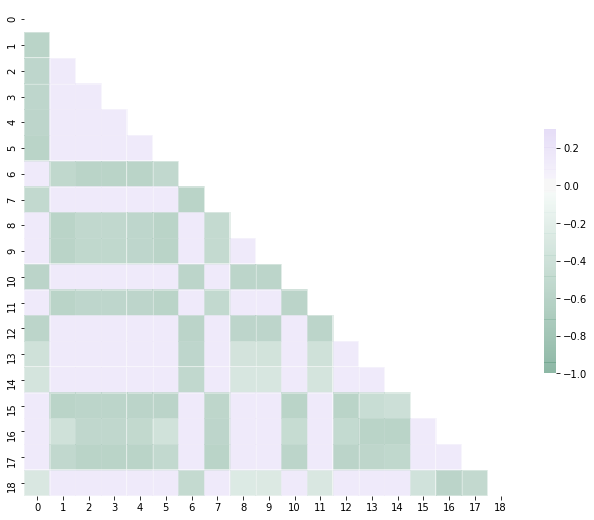

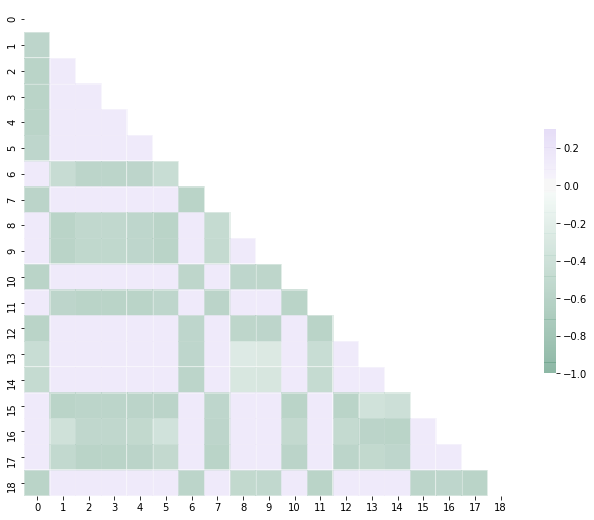

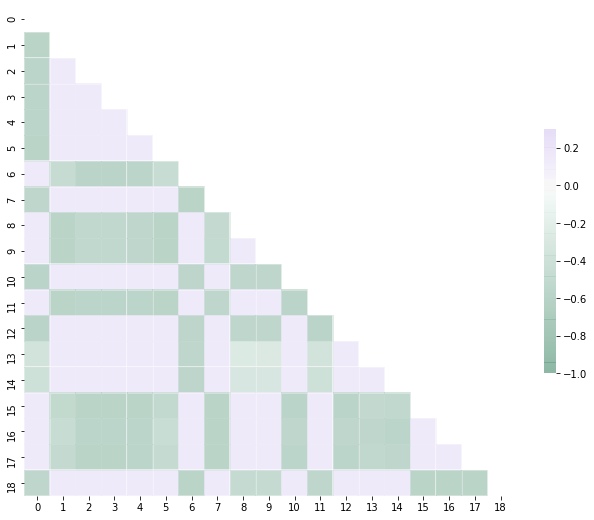

In [211]:
col_list = []
for i in range(3): 
    col_names = [' Mean', ' Median', ' Mode']
    color = colors[i]
    for j in range(3):
        col_list = np.append(col_list, color + col_names[j])
    #print (df_list[i].columns)
    corr = df_list[i].iloc[:, 2:].T.corr().round(2)
    f, ax = plt.subplots(figsize=(11, 9))
    get_triangle_corr(corr, f, ax)

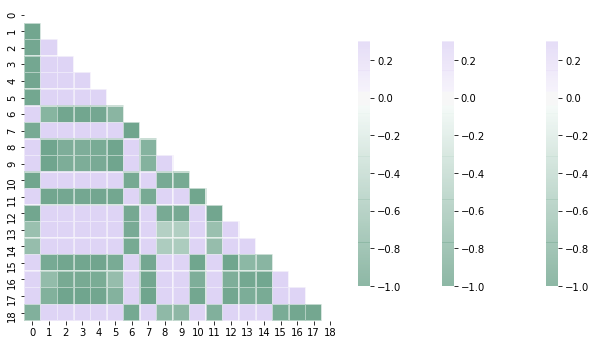

In [212]:
f, ax = plt.subplots(figsize=(11, 9))
col_list = []
for i in range(3): 
    col_names = [' Mean', ' Median', ' Mode']
    color = colors[i]
    for j in range(3):
        col_list = np.append(col_list, color + col_names[j])
    #print (df_list[i].columns)
    corr = df_list[i].iloc[:, 2:].T.corr().round(2)
    get_triangle_corr(corr, f, ax)